# **Assignment 1 : Exploratory Data Analysis - Climate Stakeholders Quest [Part 1]**

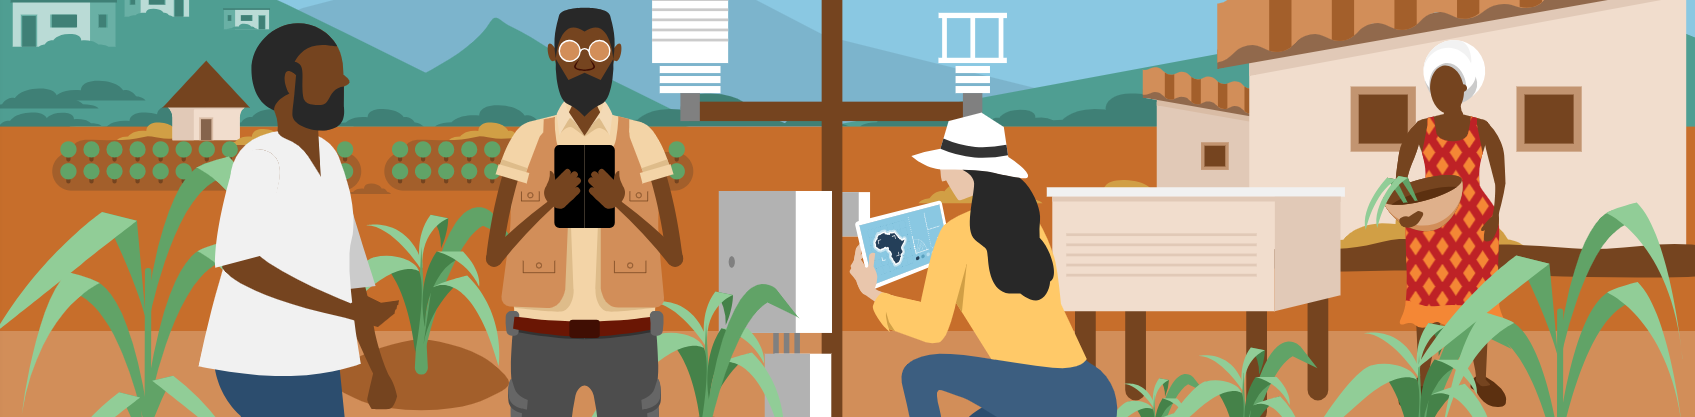

AI Forge 2025.Apache License 2.0.

**Author:** Ihssene Brahimi

**Objectives :**

* Learn Exploratory Data Analysis
* Learn basic Preprocessing and Feature Engineering

**Outline:**

>[Introduction]()

>>[Setup and Imports]()

>>[Preview the Data]()

>[Part 1 - Exploratory Data Analysis (EDA)]()

>>[1. Basic Stats]()

>>[2. Handling Missing Values]()

>>[3. Univariate Analysis]()

>>[4. Bivariate Analysis]()

>>[5. Multivariate Analysis]()

>>[6. Outliers Detection]()

>[Connecting EDA Insights to Your Role]()

## **Introduction**
    
In this assignment [Part 1-3], you'll embark on a mission to analyze and predict weather conditions in various parts of the world, using real data. But first, **choose your role**:
    
1. **Meteorologist in Algeria**: 
       You want to validate the accuracy of forecasts for Algeria's weather station for example. 
       Your success depends on building a model that predicts local rainfall or temperature shifts.
2. **Climate Researcher in East Africa**: 
       You're studying broader regional climate trends, focusing on multiple East African cities. 
       You need to see how weather evolves across different months or years.
3. **Farmer in Nairobi (Kenya)**: 
       Reliable rainfall predictions are crucial for deciding planting and harvest times. 
       You need a model that can classify "rainy vs. not rainy" days with decent lead time.
4. **Local Government Policymaker in South Africa**: 
       You want to plan infrastructure—drainage systems, water storage—based on predicted rainfall 
       intensity and climate conditions.
    
**Your mission**:

- Perform data exploration to understand temperature, precipitation, wind, and other features. `(In this part you will only work on this mission)`
- Train **multiple ML algorithms** to predict or classify a key weather outcome (e.g., rainfall).
- **Compare** performance based on relevant metrics for your role (accuracy, precision, recall, etc.).
- Build a **neural network** for deeper insights or improved performance.
- Provide **role-specific** reflections.
      
How would your chosen role leverage these data, models and insights to make data-driven decisions? Let's find out !
    

In [1]:
import ipywidgets as widgets

role_dropdown = widgets.Dropdown(
    options=[
        'Meteorologist in Algeria',
        'Climate Researcher in East Africa',
        'Farmer in Nairobi (Kenya)',
        'Local Gov Policymaker in South Africa'
    ],
    value='Meteorologist in Algeria',
    description='Choose Role:',
)

display(role_dropdown)
print("Your chosen role:", role_dropdown.value)


Dropdown(description='Choose Role:', options=('Meteorologist in Algeria', 'Climate Researcher in East Africa',…

Your chosen role: Meteorologist in Algeria


### Setup and Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# For 3D plots (if you do 3D scatter):
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (8, 5)

## 2. Dataset & Setup
**Objective:** Load the World Weather Repository (Daily Updating) Dataset from [this Kaggle link](https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository?resource=download&select=GlobalWeatherRepository.csv). Have a look at its key features (temperature, wind, pressure, etc.) and Potential Use Cases to better understand the dataset. Following are steps to download it in your local computer : 

<video controls src="assets/kaggle_dataset_tuto.mp4" title="Title"></video>

* The dataset is stored in a file named "GlobalWeatherRepository.csv"

* .csv is a file extension just like ".pdf" or ."txt" which indicates that the file format follows a Comma Separated Values (,)

* CSV Files are similar to Excel files, except that the columns are separated with commas

* Your first simple task is to read this CSV file using pandas famous function : read_csv() which outputs a dataframe.

### Preview the Data

In [ ]:
# TODO: Provide the path to your CSV dataset
df_weather = pd.read_csv("path/to/your/weather_data.csv") 

# Let's see the first few rows to understand the format:
df_weather.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


**Explanation:**

- This helps you (based on your role) quickly see if relevant columns (e.g. 'precip_mm', 'temperature_celsius') appear as expected. 
- If you are a Farmer, you might specifically look for the 'precip_mm' column to see if the data is present.

Tasks:

* How many features are there in this dataset ? HINT: Find the function that outputs the column names of a pandas dataframe.

* Can you figure out why we only see 5 countries ? The dataset cannot be that small, right ? HINT: Shape of the dataframe to get total number of rows.

In [ ]:
# TODO: Print DataFrame Columns

In [ ]:
# TODO: Print DataFrame Shape

<--Click twice on this cell. Your answer goes here-->

## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It involves analyzing and visualizing data to understand its main characteristics, uncover patterns, identify relationships between variables and detect anomalies in the data. Python offers several libraries that are commonly used for EDA, including pandas, NumPy, Matplotlib, Seaborn, and Plotly.

**Why is EDA important ?**


EDA is crucial because raw data is usually skewed, may have outliers, or too many missing values. A model built on such data results in sub-optimal performance. In the hurry to get to the machine learning stage, some data professionals either entirely skip the EDA process or do a very mediocre job. This is a mistake with many implications, including:

* Generating Inaccurate Models: Models built on unexamined data can be inaccurate and unreliable.
* Using Wrong Data: Without EDA, you might be analyzing or modeling the wrong data, leading to false conclusions.
* Inefficient Resource Use: Inefficiently using computational and human resources due to lack of proper data understanding.
* Improper Data Preparation: EDA helps in creating the right types of variables, which is critical for effective data preparation.

EDA also allows you to understand the data better before making any assumptions and take decisions accordingly.

### 1. Basic Stats

In [3]:
# TODO: Print DataFrame info (data types, non-null counts, memory usage)

# TODO: Print DataFrame description (summary statistics)

Reflection:

* Are there too many or too few rows for certain cities or regions?

* Any columns that surprise you (e.g., negative precipitation, missing lat/long)?

* Can you find the highest wind speed (kilometer per hour) using the output of one of the previous stats functions ?

### 2. Handling Missing Values

In many real-world datasets, some columns will be missing or incomplete. 

- Missing data can distort analysis. 
- If you are a Farmer, you wouldn't want to see 'precip_mm' missing for crucial months.
- If you are a Climate researcher, you might decide to fill or drop missing data for cross-country comparisons.

In [ ]:
# TODO: Print the sum or percentage of missing values per column

How would you react if you encounter many missing values that are crutial for your analysis ? Based on your role, can you pick a strategy to overcome that (with an example code) ? Justify your decision.

e.g. "As a climate researcher, I'd rather not drop important columns. I'll try imputing with mean for numeric columns."

In [ ]:
# TODO: Strategy to impute (fill) missing values (if Any)

### 3. Univariate Analysis

Univariate analysis helps you understand each variable’s distribution. You’ll create histograms, box plots, or violin plots to spot typical ranges, outliers, or skewness.

- A Meteorologist might see if typical temperature hovers around certain degrees.
- A Farmer might do the same for 'precip_mm' to gauge monthly rainfall distribution.

You could use [this website](https://www.data-to-viz.com/) to explore visualization tools of the famous `seaborn library` that could be helpful in your analysis. Feel free to use any visualization tool that works best for your goal.

**1. Histograms**

Histograms show the distribution of numerical data by grouping data points into bins. They help understand the frequency distribution of a variable.

HINT: Use matplotlib's plot function.

In [ ]:
# TODO: Choose a numeric column and plot its histogram. For example, 'temperature_celsius'

**2. Box Plots**

Box plots, also known as box-and-whisker plots, summarize data using five key metrics: minimum, lower quartile (25th percentile), median (50th percentile), upper quartile (75th percentile), and maximum. They also highlight outliers.

Please check these to better understand basic concepts :
- outliers : https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.2
- Five key metrics : https://online.stat.psu.edu/stat200/lesson/2/2.2/2.2.10
- boxplot : https://online.stat.psu.edu/stat200/lesson/3/3.1

Farmers or policymakers can see if the data has extreme rainfall outliers (important for flood planning or planting).

In [ ]:
# TODO: Implement a Box plot for a set of numeric variables of your choice (most important to your role). For example, 'temperature_celsius' by 'season', etc.

**3. Bar Charts**

Bar charts display the frequency or count of categories within a single variable, making them useful for comparing different groups. For example you could check the frequency of Sunny, Rainy and Cloudy days from `weather_condition`.

HINT: Use seaborn's countplot function.

In [ ]:
# TODO: Implement a count plot for the most important categorical variables to your role. For example, 'season' or 'weather_condition', etc.

* What do you notice ?

**4. Violin Plots**

Violin plots combine the features of box plots and density plots. They provide a visual summary of the data and show the distribution’s shape, density, and variability.

HINT : Use seaborn's violinplot.

In [ ]:
# TODO: Implement a violin plot for a set of numerical variables against a categorical variable.

* What do you notice ?

### 4. Bivariate Analysis

Bivariate analysis uncovers relationships between two variables. This is critical for seeing how one factor might influence another (e.g., does higher temperature correlate with lower humidity?).

**1. Pair Plots**

Pair plots let you see relationships between multiple pairs of numeric columns at once

- Pair plots are great for a climate researcher who wants a holistic view of how multiple weather metrics relate across certain region (e.g. East Africa).
- The policymaker might see if wind + precipitation is linked to storms/floods.

HINT: Use seaborn's pairplot function

In [ ]:
# TODO: Create a pair plot using a subset of the most important 4 variables for example ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph']

* What do you notice ?

**2. Joint Plots**

A joint plot provides a detailed view of the relationship between two variables along with their individual distributions.

- They can help Meteorologist figure out whether high temperature often correlates with lower humidity.
- Or show to a Farmer that rainfall often accompanies certain temperature ranges.

In [ ]:
# TODO: Create a joint plot for the most important variable against another one. 
# You could apply this to as much variables as you can to get better insights.

* What do you notice ?

**3. Heatmap of Correlations**

A heatmap visualizes the correlation between different variables. It uses color coding to represent the strength of the correlations, which can help identify relationships between variables.

- A correlation near 1 or -1 indicates strong linear relationships.
- E.g. if precipitation is strongly correlated with humidity, that might influence your forecasting model or policy decisions.

HINT: Use seaborn's heatmap function

In [ ]:
# TODO: implement a heatmap 

Task : What does the values in the heatmap represent and how they are calculated ?

Reflection:

* Which attributes are highly correlated to each other ? What does that mean ? 
* Which attributes are poorly correlated ? What does that mean ?
* How will this affect your choice if attributes ?

### 5. Multivariate Analysis

Multivariate analysis involves *examining more than two variables simultaneously* to understand their *relationships and combined effects.* This type of analysis is essential for **uncovering complex interactions in data.**

**1.Contour Plot**

A contour plot is a graphical technique that represents a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format. This allows us to visualize complex relationships between three variables in an easily interpretable 2-D chart.

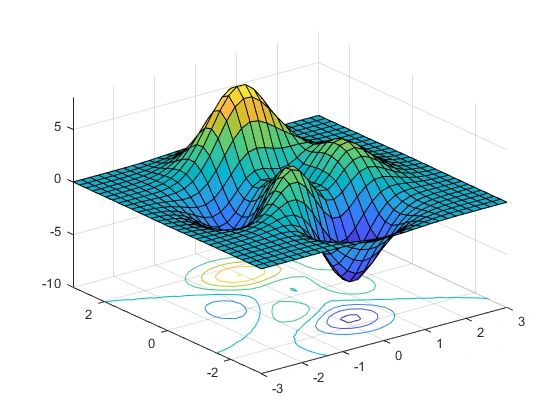

In [ ]:
# TODO: examine the relationship between two variables and how they relat to the countries. HINT: using seaborn's jointplot

* What do you notice ?

**2. 3D Scatter Plot**

A 3D scatter plot is an extension of the traditional scatter plot into three dimensions, which allows us to visualize the relationship among three variables.

- This might interest a climate researcher exploring geographic patterns across multiple East African countries.
- A policymaker can visually see if certain lat/lon areas get significantly higher rainfall.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # you could use this function 

# TODO: create a 3D scatter 

* What do you notice ?

### 6. Outlier Detection

Weather data can have important extreme events: `a storm with extremely high wind_kph, temperature anomalies, etc.` These events (values) are called "Outliers" and they can skew the analysis.

So, when you first see outliers in EDA, you need to interpret them in the domain context:

* Are they real phenomena? For example, a sudden spike in wind speed might indicate a real storm event.

* Are they data-collection errors? Maybe sensor glitches causing impossible readings.

HINT (for implementation): https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-using-iqr-and-boxplots/

**1. Box Plot Approach**

In [ ]:
# TODO: Detect outliers using Box plot approach for a chosen column

**2. IQR-based approach**

In [ ]:
# TODO: Detect outliers using IQR-based approach for a chosen column

Reflection:

* Should we remove outliers? In weather data, extremes might be exactly what we want to study (storms, floods).
* Which approach works best for you ? Why ?

<--Click twice on this cell. Your answer goes here-->

## **Connecting EDA Insights to Your Role**

After each step, we encourage you to document key findings based on your role:

Meteorologist in Nairobi:

- “Wind speeds rarely exceed X mph.”

- “Temperature typically spikes at mid-day in August, but no big difference in June.”

Climate Researcher in East Africa:

- “Correlation matrix suggests humidity and precipitation are strongly linked.”

- “3D scatter shows that southwestern regions get more rainfall.”

Farmer in Bamako:

- “Rain mostly occurs in [month range], so planting season might shift.”

- “Outliers suggest occasional heavy storms.”

Local Government Policymaker in Lusaka:

- “Outlier detection reveals rare flooding events with precipitation above X mm.”

- “Heatmap reveals low correlation between wind_kph and precipitation, so we can focus on other factors.”

<--Click twice on this cell. Your answer goes here-->

# Congrats ! You have finished the first part of the Quest ! Let's unlock the next one !